# 3. Random Forest for Prediction Housing Price 

This notebook is devoted to implement random forest regression model. 

**Implementation**
1. The libraries which are required for implementation need to be loaded. 
2. Load the pre-processed data for training and testing. 
3. Then, we want to Explore impact of each tuning parameter on the training and test score. In this section, rmse and r2-score are used as the score. 
4. To find the optimum value for tuning parametes, 5 folds cross validation has been used on trainig data. 
5. Next we train the model by these tuning parameters and then apply it on test data. 
6. Then, can get the most imortant features for random forest regressor. 

In [ ]:
# Loading required libraries

import numpy as np
import pandas as pd
import scipy as sc
import csv
import os 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from scipy.stats import norm
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from pytictoc import TicToc

from scipy import stats
%matplotlib inline



In [3]:
# Load Data

X_train =  pd.read_csv('X_train_scaled.csv')
y_train =  pd.read_csv('y_train_scaled.csv')
X_test =  pd.read_csv('X_test_scaled.csv')
y_test =  pd.read_csv('y_test_scaled.csv')


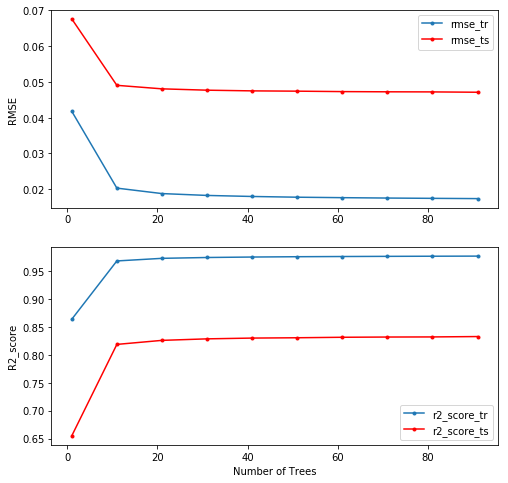

In [22]:
# Exploring impact of each tuning parameter on the training and test score

# 1. Number of Trees
rf_trees = []
n_estimators = np.arange(1,101,10)
for tree in n_estimators:
    rnd = RandomForestRegressor(n_estimators=tree,random_state=0)
    rnd.fit(X_train, y_train['price'])
    rmse_tr = np.sqrt(np.mean((rnd.predict(X_train)-y_train['price'])**2))
    rmse_ts =np.sqrt(np.mean((rnd.predict(X_test)-y_test['price'])**2))
    r2sc_tr = sklearn.metrics.r2_score(y_train['price'],rnd.predict(X_train))
    r2sc_ts = sklearn.metrics.r2_score(y_test['price'],rnd.predict(X_test))
    rf_trees.append([rmse_tr,rmse_ts,r2sc_tr,r2sc_ts,tree])   
    
ind = ['rmse_tr','rmse_ts','r2_score_tr','r2_score_ts','trees']
RF_trees = pd.DataFrame(rf_trees,columns=ind)
fig = plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(RF_trees['trees'],RF_trees['rmse_tr'],'.-')
plt.plot(RF_trees['trees'],RF_trees['rmse_ts'],'r.-')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(RF_trees['trees'],RF_trees['r2_score_tr'],'.-')
plt.plot(RF_trees['trees'],RF_trees['r2_score_ts'],'r.-')
plt.xlabel('Number of Trees')
plt.ylabel('R2_score')
plt.legend()
plt.show()

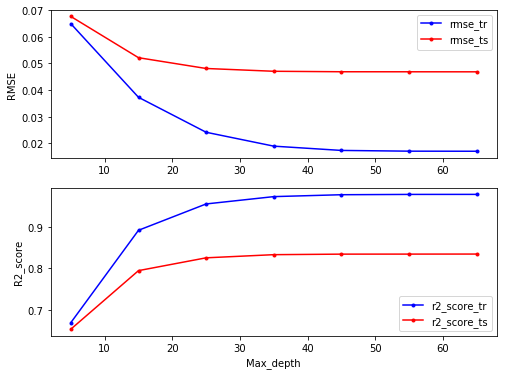

In [11]:
# 2.Max_depth

rf_depthh = []
max_depth = np.arange(5,70,10)
for depth in max_depth:
    rnd = RandomForestRegressor(n_estimators=500,max_depth=depth,random_state=0)
    rnd.fit(X_train, y_train['price'])
    rmse_tr = np.sqrt(np.mean((rnd.predict(X_train)-y_train['price'])**2))
    rmse_ts =np.sqrt(np.mean((rnd.predict(X_test)-y_test['price'])**2))
    r2sc_tr = sklearn.metrics.r2_score(y_train['price'],rnd.predict(X_train))
    r2sc_ts = sklearn.metrics.r2_score(y_test['price'],rnd.predict(X_test))
    rf_depthh.append([rmse_tr,rmse_ts,r2sc_tr,r2sc_ts,depth])   
    
indh = ['rmse_tr','rmse_ts','r2_score_tr','r2_score_ts','depth'] 
RF_Depth = pd.DataFrame(rf_depthh,columns=indh)

fig = plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(RF_Depth['depth'],RF_Depth['rmse_tr'],'b.-')
plt.plot(RF_Depth['depth'],RF_Depth['rmse_ts'],'r.-')
plt.ylabel('RMSE')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(RF_Depth['depth'],RF_Depth['r2_score_tr'],'b.-')
plt.plot(RF_Depth['depth'],RF_Depth['r2_score_ts'],'r.-')
plt.ylabel('R2_score')
plt.xlabel('Max_depth')
plt.legend()

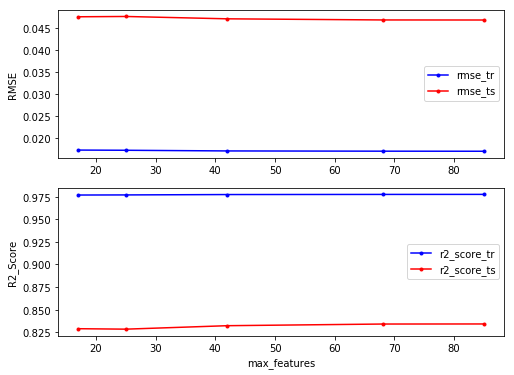

In [18]:
# 3. Number of features
[N,D] = X_train.shape
rf_feature = []
max_features = [int(0.2*D),int(0.3*D), int(0.5*D),int(0.8*D),D]
for feature in max_features:
    rnd = RandomForestRegressor(n_estimators=300,max_features = feature,random_state=0)
    rnd.fit(X_train, y_train['price'])
    rmse_tr = np.sqrt(np.mean((rnd.predict(X_train)-y_train['price'])**2))
    rmse_ts =np.sqrt(np.mean((rnd.predict(X_test)-y_test['price'])**2))
    r2sc_tr = sklearn.metrics.r2_score(y_train['price'],rnd.predict(X_train))
    r2sc_ts = sklearn.metrics.r2_score(y_test['price'],rnd.predict(X_test))
    rf_feature.append([rmse_tr,rmse_ts,r2sc_tr,r2sc_ts,feature])  
    

indf= ['rmse_tr','rmse_ts','r2_score_tr','r2_score_ts','max_features']
RF_feature = pd.DataFrame(rf_feature,columns=indf)

fig = plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(RF_feature['max_features'],RF_feature['rmse_tr'],'b.-')
plt.plot(RF_feature['max_features'],RF_feature['rmse_ts'],'r.-')
plt.ylabel('RMSE')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(RF_feature['max_features'],RF_feature['r2_score_tr'],'b.-')
plt.plot(RF_feature['max_features'],RF_feature['r2_score_ts'],'r.-')
plt.ylabel('R2_Score')
plt.xlabel('max_features')
plt.legend()

In [9]:
# Training with Cross-Validation

# Here cross validation is used for tuning three important parameters for random forest regressor. 

[N,D] = X_train.shape
rf = []
n_estimators = np.arange(100,1000,200)
max_depth = np.arange(20,41,10)
max_features = [int(0.2*D), int(0.5*D),int(0.8*D),D]
for tree in n_estimators:
    for depth in max_depth:
        for feature in max_features:
            rf_cv_rmse = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=tree,max_depth=depth,
                                max_features=feature,random_state=0),X_train, y_train['price'],
                                scoring="neg_mean_squared_error", cv = 5)).mean()
            rf.append([rf_cv_rmse,tree,depth,feature]) 

In [10]:
# Best choice of parameters
index = ['cv_rmse','num_trees','max_depth','max_features']
RF = pd.DataFrame(rf,columns=index)
RF.iloc[np.argmin(RF['cv_rmse'])]

cv_rmse           0.046545
num_trees       700.000000
max_depth        40.000000
max_features     68.000000
Name: 46, dtype: float64

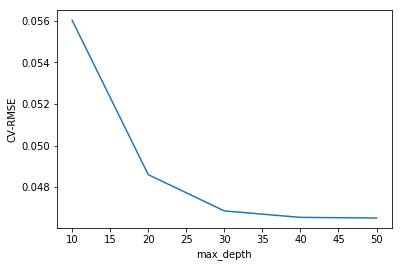

In [20]:
# Variation of Validation score with changing max_depth

rf_depth = []
max_depth = np.arange(10,60,10)
for depth in max_depth:
        rf_cv_rmse = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=700 ,max_depth=depth,max_features=68,
                        random_state=0), X_train, y_train['price'], scoring="neg_mean_squared_error", cv = 5)).mean()
        rf_depth.append([rf_cv_rmse,depth]) 
idx = ['rmse','max_depth']
RF_depth = pd.DataFrame(rf_depth,columns=idx)
plt.plot(RF_depth['max_depth'],RF_depth['rmse'])
plt.xlabel('max_depth')
plt.ylabel('CV-RMSE')

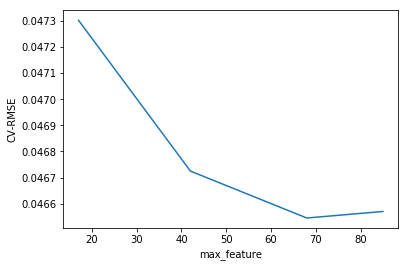

In [6]:
# Variation of Validation score with changing max_features
rnf_feature = []
max_feature = [int(0.2*D), int(0.5*D),int(0.8*D),D]
for feature in max_feature:
        rf_cv_rmse = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=700,max_features=feature,max_depth=40,random_state=0), X_train, y_train['price'], scoring="neg_mean_squared_error", cv = 5)).mean()
        rnf_feature.append([rf_cv_rmse,feature]) 
idxf = ['rmse','max_features']
RF_features = pd.DataFrame(rnf_feature,columns=idxf)
plt.plot(RF_features['max_features'],RF_features['rmse'])
plt.xlabel('max_feature')
plt.ylabel('CV-RMSE')

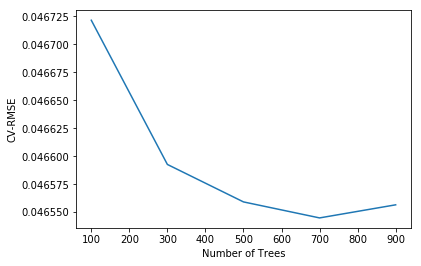

In [7]:
# Variation of training score with changing number of trees
rf_tree = []
n_estimators = np.arange(100,1000,200)
for tree in n_estimators:
        rf_cv_rmse = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=tree,max_depth=40,max_features=68,random_state=0), X_train, y_train['price'], scoring="neg_mean_squared_error", cv = 5)).mean()
        rf_tree.append([rf_cv_rmse,tree]) 

idxx = ['rmse','tree']
RF_tree = pd.DataFrame(rf_tree,columns=idxx)
plt.plot(RF_tree['tree'],RF_tree['rmse'])
plt.xlabel('Number of Trees')
plt.ylabel('CV-RMSE') 

In [13]:
# Training 
t = TicToc() 
t.tic()
randomforest = RandomForestRegressor(n_estimators=700,max_depth=40,max_features=68,random_state=0)
randomforest.fit(X_train, y_train['price'])
t.toc()

Elapsed time is 138.117023 seconds.


In [14]:
# Testing 
y_pred = randomforest.predict(X_test)
mse = (np.mean((y_pred-y_test['price'])**2))
rmse = np.sqrt(np.mean((y_pred-y_test['price'])**2))
mmae = np.mean(abs(y_pred-y_test['price']))
r2_score = sklearn.metrics.r2_score(y_test,y_pred)

print('{0:10} ==> {1:10f}'.format('MSE',mse))
print('{0:10} ==> {1:10f}'.format('RMSE',rmse))
print('{0:10} ==> {1:10f}'.format('MMAE',mmae))
print('{0:10} ==> {1:10f}'.format('R2_score',r2_score))

MSE        ==>   0.002198
RMSE       ==>   0.046888
MMAE       ==>   0.033696
R2_score   ==>   0.834016


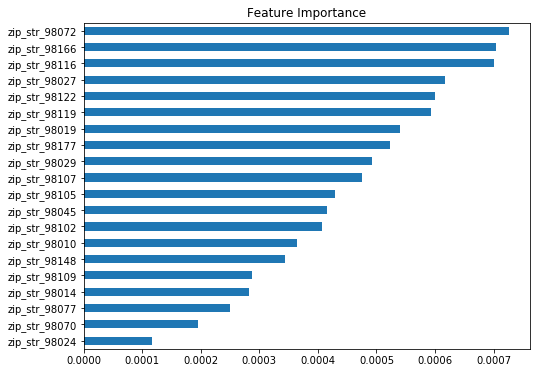

In [15]:
# Feature Importance

coef = pd.Series(randomforest.feature_importances_, index = X_train.columns).sort_values(ascending=True)
coef.head(20).plot(kind='barh',figsize=(8, 6))
plt.title('Feature Importance')

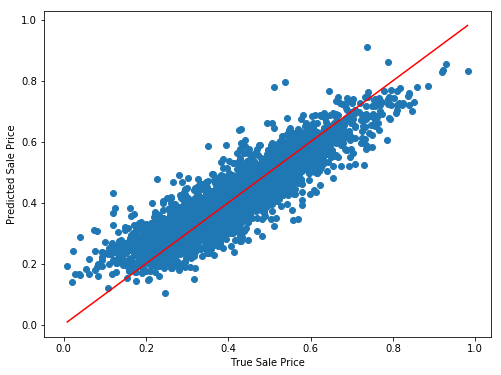

In [16]:
# Visualization 

plt.figure(figsize=(8, 6))
plt.scatter(y_test['price'], y_pred)
plt.plot([min(y_test['price']), max(y_test['price'])], [min(y_test['price']), max(y_test['price'])],'r')
plt.xlabel('True Sale Price')
plt.ylabel('Predicted Sale Price')